# Business Problem

- The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
- Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

## Solution :-

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (59)\IRIS.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df[df.duplicated(keep='first')]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
# there is a duplicate records in a dataset
# so we drop the duplicates

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df['species'] = df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df['species'].value_counts()

species
1    50
2    49
0    48
Name: count, dtype: int64

<Axes: >

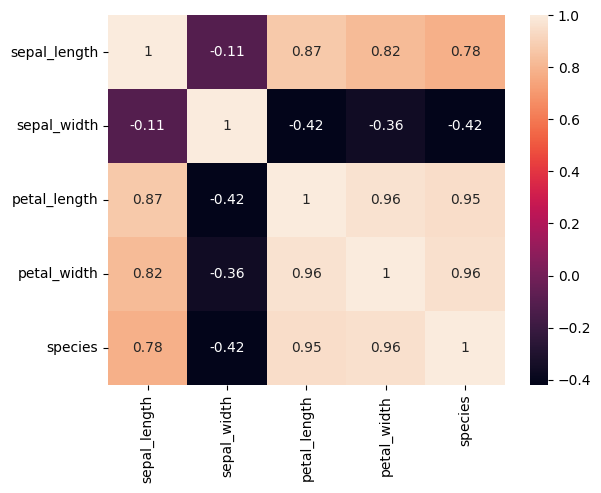

In [17]:
sns.heatmap(df.corr(),annot=True)

## Visualization

<Axes: xlabel='species', ylabel='sepal_length'>

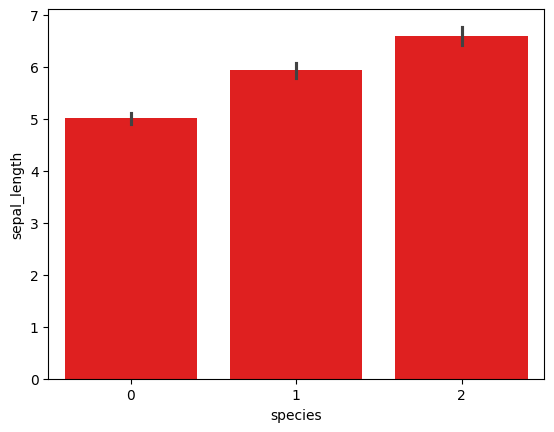

In [39]:
sns.barplot(data=df,x='species',y='sepal_length',color='red')

In [19]:
# inferences :- 

# if sepal_length is below 5 so then it belongs to species 0 which is Iris-setosa
# if sepal_length is above 5 and below 6 so then it belongs to species 0 which is Iris-Versicolor
# if sepal_length is above 6 and below 7 so then it belongs to species 0 which is Iris-Viginica

<Axes: xlabel='species', ylabel='sepal_width'>

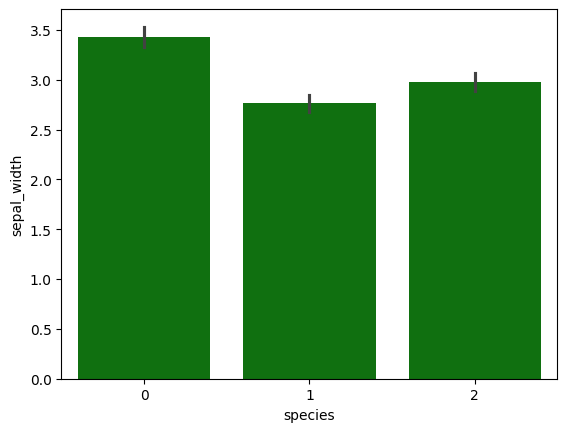

In [40]:
sns.barplot(data=df,x='species',y='sepal_width',color='green')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

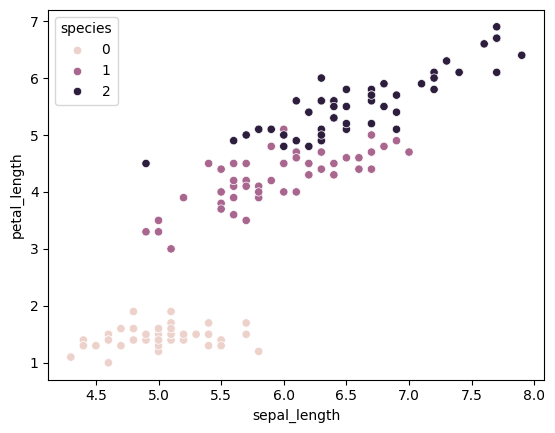

In [41]:
sns.scatterplot(data=df,x='sepal_length',y='petal_length',hue='species')

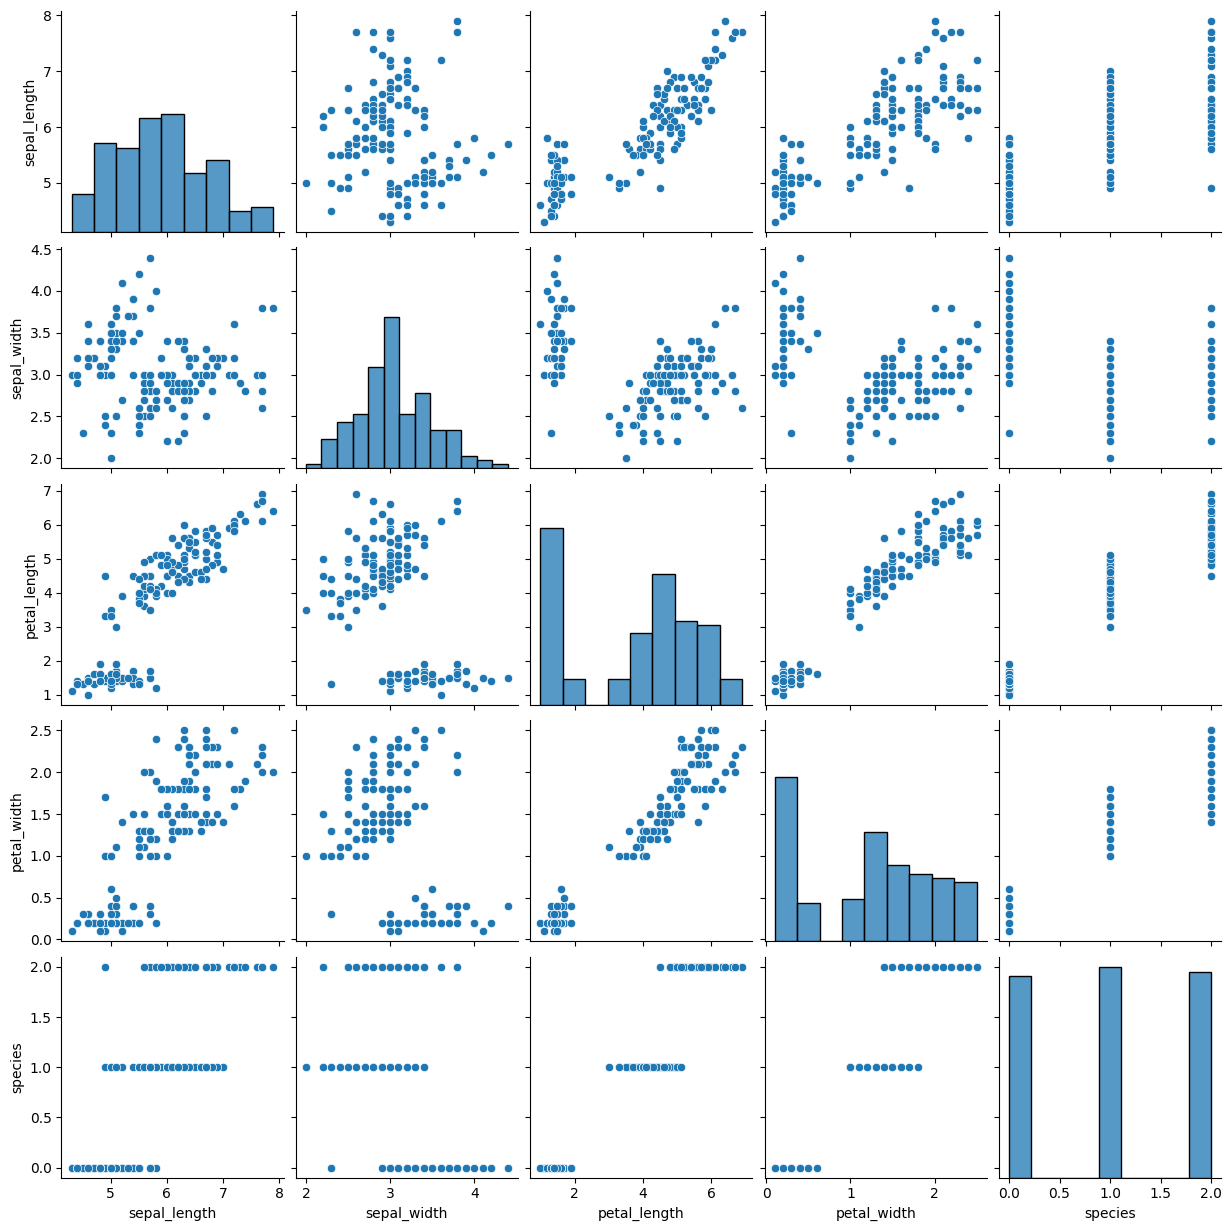

In [21]:
sns.pairplot(data=df)

In [22]:
df['species'].astype('int')

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

In [23]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

## Outliers

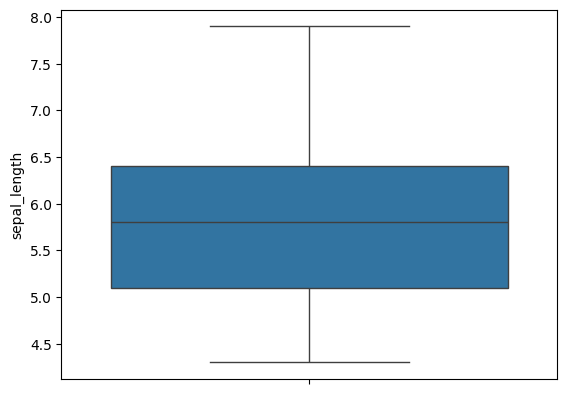

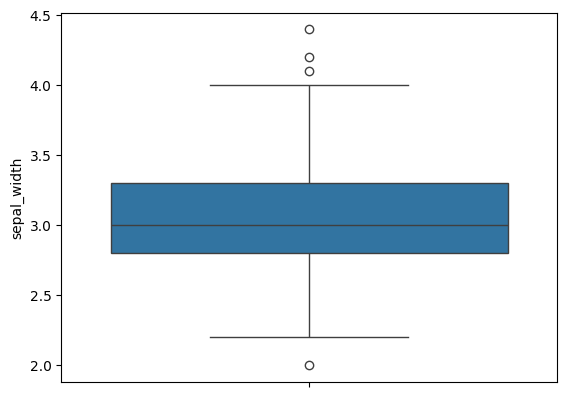

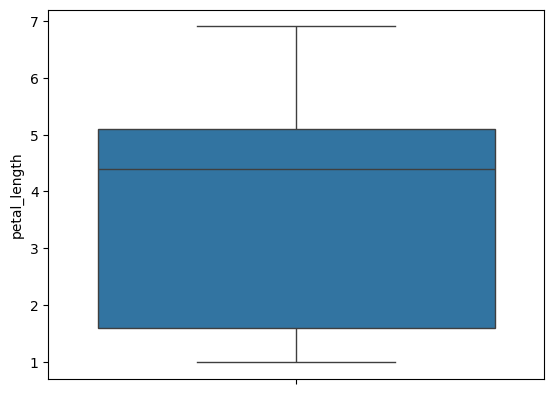

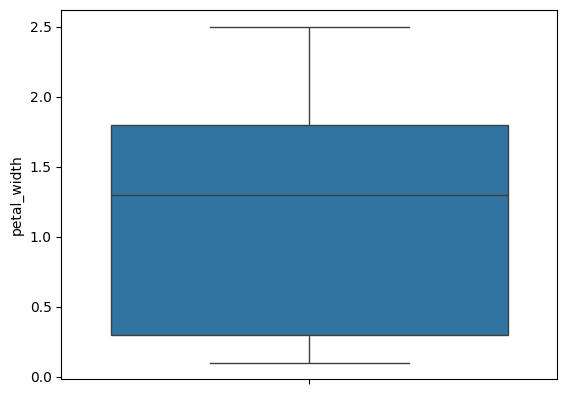

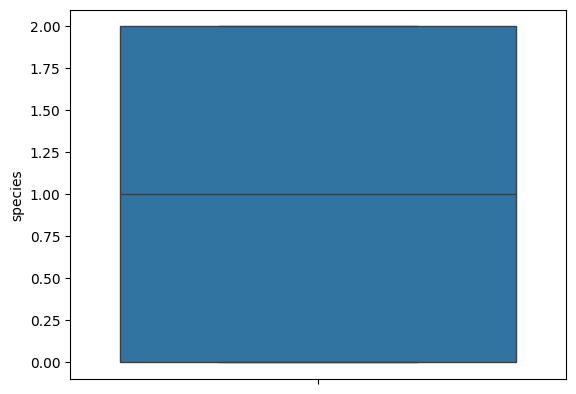

In [24]:
import matplotlib.pyplot as plt

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [25]:
# In this dataset no need to encoding the data and scaling the data
# In this dataset no need to remove outliers because we have very small amount of dataset if we 
# drop the outiers we loose the data.

## Model Building

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
x = df.drop('species',axis=1)
y = df['species']


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=100)

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR_model = LR.fit(xtrain,ytrain)
train_pred = LR_model.predict(xtrain)
test_pred = LR_model.predict(xtest)

In [34]:
from sklearn.metrics import classification_report

print('train_report',classification_report(ytrain,train_pred))
print('train_report',classification_report(ytest,test_pred))


train_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.93      0.98      0.95        42
           2       0.96      0.90      0.93        29

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102

train_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89         8
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.93      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [35]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT_model = DT.fit(xtrain,ytrain)
train_pred = DT_model.predict(xtrain)
test_pred = DT_model.predict(xtest)

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        29

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89         8
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.93      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [36]:
from sklearn.ensemble import RandomForestClassifier

RD = RandomForestClassifier()
RD_model = RD.fit(xtrain,ytrain)
train_pred = RD_model.predict(xtrain)
test_pred= RD_model.predict(xtest)

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        29

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.73      1.00      0.84         8
           2       1.00      0.85      0.92        20

    accuracy                           0.93        45
   macro avg       0.91      0.95      0.92        45
weighted avg       0.95      0.93      0.94        45



In [37]:
# hyperparameter_tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50,70,120,150,200],
             'min_samples_split':[3,4,5,6,7],
             'min_samples_leaf':[2,3,4,5,6,7]}

from sklearn.metrics import roc_auc_score

GSCV = GridSearchCV(estimator=RD,param_grid=param_grid,scoring=roc_auc_score,n_jobs=-1)
GSCV_model = GSCV.fit(xtrain,ytrain)

print("best_parametrs:", GSCV_model.best_params_)

best_parametrs: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


In [38]:
# tuned_model (Random_forest_classifier)

from sklearn.ensemble import RandomForestClassifier

RD = RandomForestClassifier(min_samples_leaf = 2, min_samples_split= 3, n_estimators = 50)
RD_model = RD.fit(xtrain,ytrain)
train_pred_4 = RD_model.predict(xtrain)
test_pred_4 = RD_model.predict(xtest)

print(classification_report(ytrain,train_pred_4))
print(classification_report(ytest,test_pred_4))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.98      0.98      0.98        42
           2       0.97      0.97      0.97        29

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89         8
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.93      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



## Interpretation

- Logistic Regression: Trains and evaluates a logistic regression model.
- Decision Tree Classifier: Trains and evaluates a decision tree model.
- Random Forest Classifier: Trains and evaluates a random forest model.
- GridSearchCV: Performs hyperparameter tuning for the random forest model.
- Tuned Random Forest Classifier: Trains and evaluates the random forest model with the best parameters found by GridSearchCV.